Social_Network_Ads using SVM 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [16]:
dataset=pd.read_csv("Social_Network_Ads.csv")
print(dataset)
dataset.head()


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Z = LabelEncoder()
X[:,0] = labelencoder_Z.fit_transform(X[:,0])
print(X)

[[     1  19000]
 [    17  20000]
 [     8  43000]
 [     9  57000]
 [     1  76000]
 [     9  58000]
 [     9  84000]
 [    14 150000]
 [     7  33000]
 [    17  65000]
 [     8  80000]
 [     8  52000]
 [     2  86000]
 [    14  18000]
 [     0  82000]
 [    11  80000]
 [    29  25000]
 [    27  26000]
 [    28  28000]
 [    30  29000]
 [    27  22000]
 [    29  49000]
 [    30  41000]
 [    27  22000]
 [    28  23000]
 [    29  20000]
 [    31  28000]
 [    29  30000]
 [    11  43000]
 [    13  18000]
 [    13  74000]
 [     9 137000]
 [     3  16000]
 [    10  44000]
 [     9  90000]
 [    17  27000]
 [    15  28000]
 [    12  49000]
 [     8  72000]
 [     9  31000]
 [     9  17000]
 [    15  51000]
 [    17 108000]
 [    12  15000]
 [    10  84000]
 [     5  20000]
 [     7  79000]
 [     9  54000]
 [    12 135000]
 [    13  89000]
 [     6  32000]
 [     0  44000]
 [    11  83000]
 [    17  23000]
 [     9  58000]
 [     6  55000]
 [     5  48000]
 [    10  79000]
 [     4  1800

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print('Shape of X_train =', X_train.shape)
print('Shape of Y_train =', y_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of Y_test =', y_test.shape)

Shape of X_train = (320, 2)
Shape of Y_train = (320,)
Shape of X_test = (80, 2)
Shape of Y_test = (80,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
print(len(y_pred))
print(y_test)

80
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [23]:
classifier.score(X_test,y_test)

0.9125

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[57  1]
 [ 6 16]]


In [25]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf',random_state=0)
classifier1.fit(X_train,y_train)

SVC(random_state=0)

In [26]:
y_pred1 = classifier1.predict(X_test)
print(classifier1.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred1))

0.95
[[55  3]
 [ 1 21]]


In [27]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly',random_state=0)
classifier2.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

In [28]:
y_pred2 = classifier2.predict(X_test)

print(classifier2.score(X_test,y_test))

print(confusion_matrix(y_test,y_pred2))

0.9125
[[58  0]
 [ 7 15]]


In [29]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'sigmoid',random_state=0)
classifier3.fit(X_train,y_train)

SVC(kernel='sigmoid', random_state=0)

0.9125
[[58  0]
 [ 7 15]]


<Axes: xlabel='Age', ylabel='Purchased'>

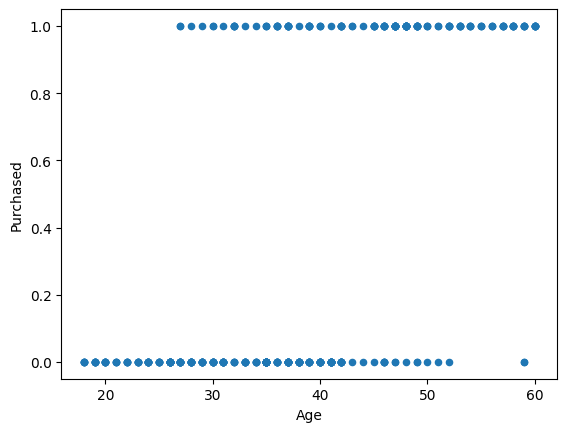

In [30]:
y_pred3 = classifier3.predict(X_test)
print(classifier.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred2))
dataset.plot(kind='scatter',x='Age',y='Purchased')

<ipython-input-31-5eaa387b6804>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


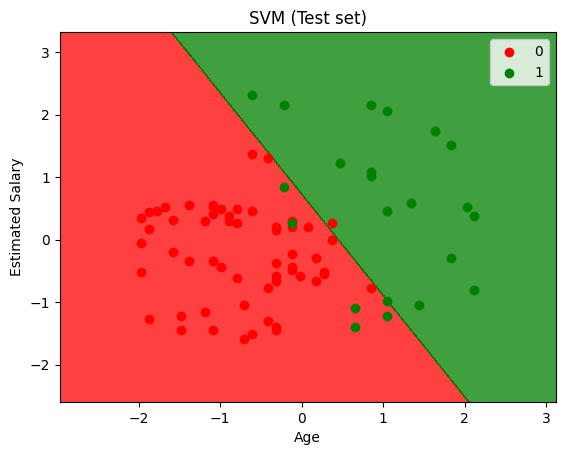

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [32]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    ax.show()

In [33]:
x1 = dataset["Age"]
x2= dataset['EstimatedSalary']
y = dataset['Purchased']

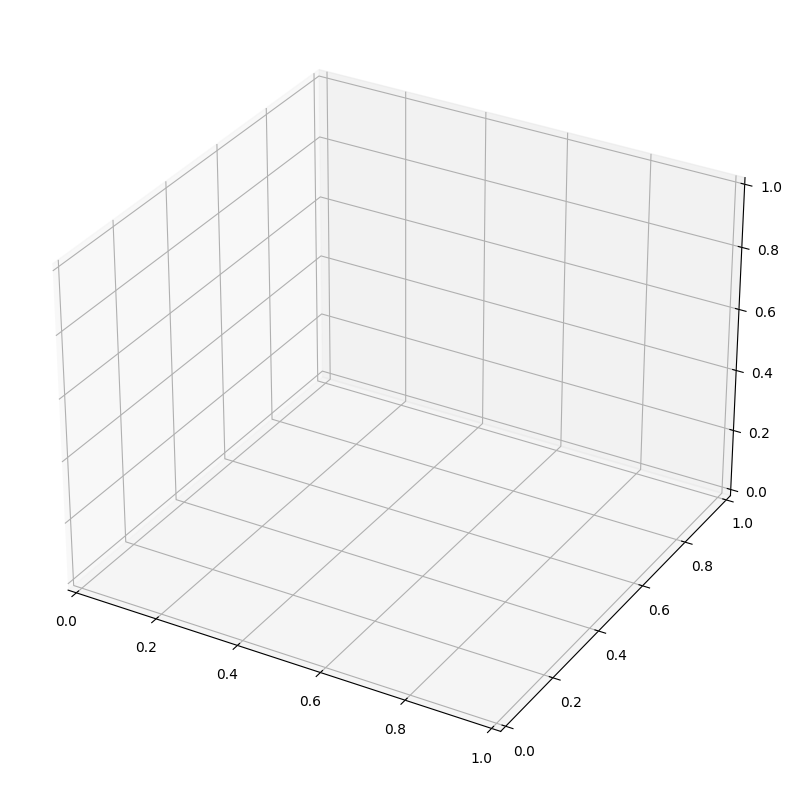

In [34]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

In [35]:
ax.scatter(x1, x2, y, c = 'b', s = 50,cmap='bwr')
ax.set_title('3D Scatter Plot')

<ipython-input-35-67428d479364>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1, x2, y, c = 'b', s = 50,cmap='bwr')


Text(0.5, 0.92, '3D Scatter Plot')

In [36]:
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('y', labelpad=20)
plt.show()